In [1]:
import pandas as pd

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [3]:
df = pd.read_csv('imports-85.data',names=cols)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
import numpy as np
df.replace('?',np.nan,inplace=True)

In [6]:
df.drop('normalized-losses',inplace=True,axis=1)

In [7]:
df.dropna(inplace=True)

In [8]:
df['price'] = df['price'].astype(int)

In [9]:
df['bore'] = df['bore'].astype(float)

In [10]:
df['stroke'] = df['stroke'].astype(float)

In [11]:
df['horsepower'] = df['horsepower'].astype(int)
df['peak-rpm'] = df['peak-rpm'].astype(int)

In [12]:
df.dtypes

symboling             int64
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base          float64
length              float64
width               float64
height              float64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
bore                float64
stroke              float64
compression-rate    float64
horsepower            int64
peak-rpm              int64
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
df['make'] = le.fit_transform(df['make'])

In [18]:
df['fuel-type'] = le.fit_transform(df['fuel-type'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['num-of-doors'] = le.fit_transform(df['num-of-doors'])
df['body-style'] = le.fit_transform(df['body-style'])
df['drive-wheels'] = le.fit_transform(df['drive-wheels'])
df['engine-location'] = le.fit_transform(df['engine-location'])
df['engine-type'] = le.fit_transform(df['engine-type'])
df['num-of-cylinders'] = le.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = le.fit_transform(df['fuel-system'])

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
def knn_train_test(training_column, target_column, df):
    X = df[training_column]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knr = KNeighborsRegressor()
    scaler = MinMaxScaler()
    scaled_x_train = scaler.fit_transform(X_train)
    scaled_x_test = scaler.transform(X_test)
    scaled_x_train = scaled_x_train.reshape(-1,1)
    scaled_x_test = scaled_x_test.reshape(-1,1)
    knr.fit(scaled_x_train,y_train)
    preds = knr.predict(scaled_x_test)
    m = sqrt(mean_squared_error(y_test,preds))
    return m

In [21]:
df.columns[:-1]

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [22]:
list1 = []

In [23]:
for column in df.columns[:-1]:
    k = knn_train_test(column,'price',df)
    list1.append([column,k])

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)

In [24]:
list1

[['symboling', 8975.781852679831],
 ['make', 7664.430597425918],
 ['fuel-type', 9226.428757687867],
 ['aspiration', 9126.341166437232],
 ['num-of-doors', 9258.169193111338],
 ['body-style', 8632.828181324812],
 ['drive-wheels', 7740.921107001905],
 ['engine-location', 9105.846478821288],
 ['wheel-base', 6064.838648165],
 ['length', 5826.070866905662],
 ['width', 4907.172627196179],
 ['height', 9251.70056882368],
 ['curb-weight', 5320.3063367208215],
 ['engine-type', 9255.296630802166],
 ['num-of-cylinders', 6969.879317413633],
 ['engine-size', 3597.6160547286563],
 ['fuel-system', 7696.78474595186],
 ['bore', 7417.6257282325805],
 ['stroke', 8905.774945544586],
 ['compression-rate', 6179.485682035582],
 ['horsepower', 3784.351065675047],
 ['peak-rpm', 8550.875233726581],
 ['city-mpg', 3283.6046339980994],
 ['highway-mpg', 4312.342934511074]]

In [25]:
def knn_train_test(training_column, target_column, df, k):
    X = df[training_column]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knr = KNeighborsRegressor(n_neighbors=k)
    scaler = MinMaxScaler()
    scaled_x_train = scaler.fit_transform(X_train)
    scaled_x_test = scaler.transform(X_test)
    scaled_x_train = scaled_x_train.reshape(-1,1)
    scaled_x_test = scaled_x_test.reshape(-1,1)
    knr.fit(scaled_x_train,y_train)
    preds = knr.predict(scaled_x_test)
    m = sqrt(mean_squared_error(y_test,preds))
    return m

In [26]:
list2 = []

In [27]:
for column in df.columns[:-1]:
    for v in [1,3,5,7,9]:
        k = knn_train_test(column,'price',df,v)
        list2.append([column,k])

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)

In [28]:
list2

[['symboling', 8694.319576398819],
 ['symboling', 8738.567088518368],
 ['symboling', 8975.781852679831],
 ['symboling', 8849.78626152836],
 ['symboling', 8788.238688646117],
 ['make', 5284.299976475532],
 ['make', 8075.1283225275965],
 ['make', 7664.430597425918],
 ['make', 7534.407429627282],
 ['make', 7550.520679707831],
 ['fuel-type', 10230.920248830553],
 ['fuel-type', 9313.41238046412],
 ['fuel-type', 9226.428757687867],
 ['fuel-type', 9308.97707205678],
 ['fuel-type', 9282.151850362075],
 ['aspiration', 10383.143875598533],
 ['aspiration', 9300.4654951891],
 ['aspiration', 9126.341166437232],
 ['aspiration', 9489.743740871894],
 ['aspiration', 9355.08387716924],
 ['num-of-doors', 10265.399765465912],
 ['num-of-doors', 9360.756224772487],
 ['num-of-doors', 9258.169193111338],
 ['num-of-doors', 9599.774358053703],
 ['num-of-doors', 9552.03969708185],
 ['body-style', 9027.707206915447],
 ['body-style', 8842.881533965881],
 ['body-style', 8632.828181324812],
 ['body-style', 8480.7327

In [29]:
mydict = {'aspiration': [],
 'body-style': [],
 'bore': [],
 'city-mpg': [],
 'compression-rate': [],
 'curb-weight': [],
 'drive-wheels': [],
 'engine-location': [],
 'engine-size': [],
 'engine-type': [],
 'fuel-system': [],
 'fuel-type': [],
 'height': [],
 'highway-mpg': [],
 'horsepower': [],
 'length': [],
 'make': [],
 'num-of-cylinders': [],
 'num-of-doors': [],
 'peak-rpm': [],
 'stroke': [],
 'symboling': [],
 'wheel-base': [],
 'width': []}
for x in list2:
    mydict[x[0]].append(x[1])

In [30]:
mydict.keys()

dict_keys(['curb-weight', 'length', 'make', 'body-style', 'engine-type', 'engine-size', 'engine-location', 'highway-mpg', 'peak-rpm', 'drive-wheels', 'height', 'compression-rate', 'num-of-doors', 'fuel-type', 'horsepower', 'wheel-base', 'stroke', 'width', 'fuel-system', 'aspiration', 'city-mpg', 'bore', 'num-of-cylinders', 'symboling'])

In [31]:
from statistics import mean

In [32]:
for x in mydict.keys():
    mydict[x] = mean(mydict[x])

In [33]:
mydict

{'aspiration': 9530.9556310532,
 'body-style': 8683.53265663939,
 'bore': 7511.695140658671,
 'city-mpg': 3655.1768927378885,
 'compression-rate': 6490.928698848779,
 'curb-weight': 5411.249239355665,
 'drive-wheels': 7642.621197044815,
 'engine-location': 9378.804001784374,
 'engine-size': 3620.755620817848,
 'engine-type': 8695.213420552664,
 'fuel-system': 7740.975049728423,
 'fuel-type': 9472.37806188028,
 'height': 8939.33044623436,
 'highway-mpg': 4966.38687030929,
 'horsepower': 4026.8358673778143,
 'length': 6260.635309712598,
 'make': 7221.757401152831,
 'num-of-cylinders': 6590.430769891662,
 'num-of-doors': 9607.227847697057,
 'peak-rpm': 8384.610693892533,
 'stroke': 8960.9351926666,
 'symboling': 8809.338693554299,
 'wheel-base': 6218.15594512196,
 'width': 4642.827685695277}

In [34]:
def knn_train_test(training_columns, target_column, df):
    X = df[training_columns]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knr = KNeighborsRegressor()
    scaler = MinMaxScaler()
    scaled_x_train = scaler.fit_transform(X_train)
    scaled_x_test = scaler.transform(X_test)
    knr.fit(scaled_x_train,y_train)
    preds = knr.predict(scaled_x_test)
    m = sqrt(mean_squared_error(y_test,preds))
    return m

In [35]:
knn_train_test(['city-mpg','engine-size'], 'price', df)

3006.145660659751

In [36]:
knn_train_test(['city-mpg','engine-size','horsepower'], 'price', df)

2934.08358494578

In [37]:
knn_train_test(['city-mpg','engine-size','horsepower','width'], 'price', df)

3750.1436915918575

In [38]:
knn_train_test(['city-mpg','engine-size','horsepower','width','highway-mpg'], 'price', df)

3984.583670200387

In [39]:
def knn_train_test(training_columns, target_column, df, k):
    X = df[training_columns]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knr = KNeighborsRegressor(n_neighbors=k)
    scaler = MinMaxScaler()
    scaled_x_train = scaler.fit_transform(X_train)
    scaled_x_test = scaler.transform(X_test)
    knr.fit(scaled_x_train,y_train)
    preds = knr.predict(scaled_x_test)
    m = sqrt(mean_squared_error(y_test,preds))
    return m

In [40]:
list2 = []

In [41]:
for v in range(1,26):
    k = knn_train_test(['city-mpg','engine-size'],'price',df,v)
    list2.append(k)

In [42]:
list2

[2641.49597439758,
 2639.72527959334,
 2682.38890926286,
 2950.4058319620817,
 3006.145660659751,
 3181.333036914314,
 3606.186091471084,
 3955.996093441629,
 4125.785677489473,
 4376.5980141248265,
 4531.126879370153,
 4663.829829023572,
 4803.751454182926,
 4817.096191398777,
 4843.970163154658,
 4810.106890470371,
 4765.370370262917,
 4766.693860031034,
 4850.530637160306,
 4805.539894773388,
 4916.785392440501,
 5003.997142293186,
 5065.800071011644,
 5154.352661841997,
 5211.087261559358]

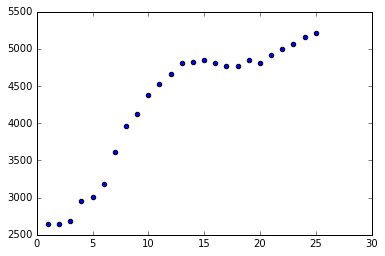

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y=list2,x=range(1,26))
plt.xlim(xmin=0);

In [45]:
list2 = []
for v in range(1,26):
    k = knn_train_test(['city-mpg','engine-size','horsepower'],'price',df,v)
    list2.append(k)

In [46]:
list2

[2296.373719284535,
 3277.6770902208505,
 3119.3117732437904,
 2938.328595352678,
 2934.08358494578,
 3008.0249636584363,
 3287.704640093543,
 3323.921269060006,
 3531.5071666097597,
 3770.60055867808,
 4102.947365448656,
 4394.555643193687,
 4629.9000303860885,
 4719.152532611718,
 4832.379194264948,
 4981.419988628898,
 5102.81806104443,
 5250.372553486507,
 5279.728139660498,
 5329.387156800392,
 5347.003151358822,
 5440.144823716891,
 5541.195406258791,
 5599.947482363231,
 5680.487777586564]

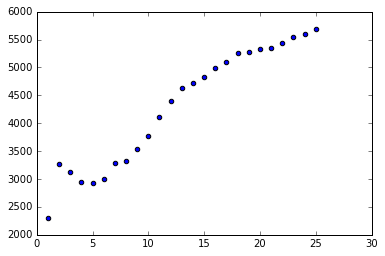

In [47]:
%matplotlib inline
plt.scatter(y=list2,x=range(1,26))
plt.xlim(xmin=0);

In [48]:
list2 = []
for v in range(1,26):
    k = knn_train_test(['city-mpg','engine-size','horsepower','width'],'price',df,v)
    list2.append(k)

In [49]:
list2

[2111.7731885787357,
 2849.547427768741,
 3428.6858364589343,
 3782.5990376361415,
 3750.1436915918575,
 3834.464614304387,
 4130.19425194039,
 4277.266165431621,
 4472.039108528429,
 4558.782364596781,
 4601.504250698189,
 4575.184356708348,
 4624.814392179407,
 4652.288471332805,
 4818.3027406559895,
 4932.551617747724,
 5035.268251412208,
 5131.782953053026,
 5176.582174459431,
 5271.450129004941,
 5232.631450068994,
 5206.475216829215,
 5249.823866036382,
 5216.861523070361,
 5318.775645124771]

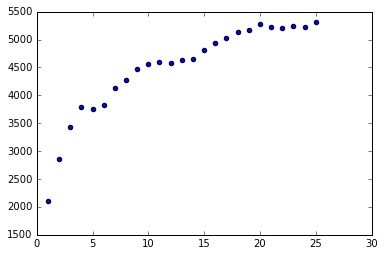

In [50]:
%matplotlib inline
plt.scatter(y=list2,x=range(1,26))
plt.xlim(xmin=0);